# AI Voiceover with GPT4V

## 1. Importing Libraries


In [287]:
from pathlib import Path
from IPython.display import display, Image, Audio
from dotenv import load_dotenv
import cv2
import base64
import time
from openai import OpenAI
import os
import requests

## 2. Extracting Frames from the Video


In [288]:
video = cv2.VideoCapture("data/tik6.mp4")
short_description = 'national parks'

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

392 frames read.


In [289]:
if len(base64Frames)<=1000:
    frames1=base64Frames
    print(len(frames1))

# if len(base64Frames)>500 and len(base64Frames)<1000:
#     oneHalf = int(round(len(base64Frames),0))
#     frames1=base64Frames[:oneHalf]
#     frames2=base64Frames[oneHalf:]
#     print(len(frames1), len(frames2))

# if len(base64Frames)>1000:
#     oneFourth = int(round(len(base64Frames)/4,0))
#     twoFourth = int(round(len(base64Frames)/2,0))
#     threeFourth = oneFourth+twoFourth
    
#     frames1=base64Frames[:oneFourth]
#     frames2=base64Frames[oneFourth:twoFourth]
#     frames3=base64Frames[twoFourth:threeFourth]
#     frames4=base64Frames[threeFourth:]
#     print(len(frames1), len(frames2), len(frames3), len(frames4))

392


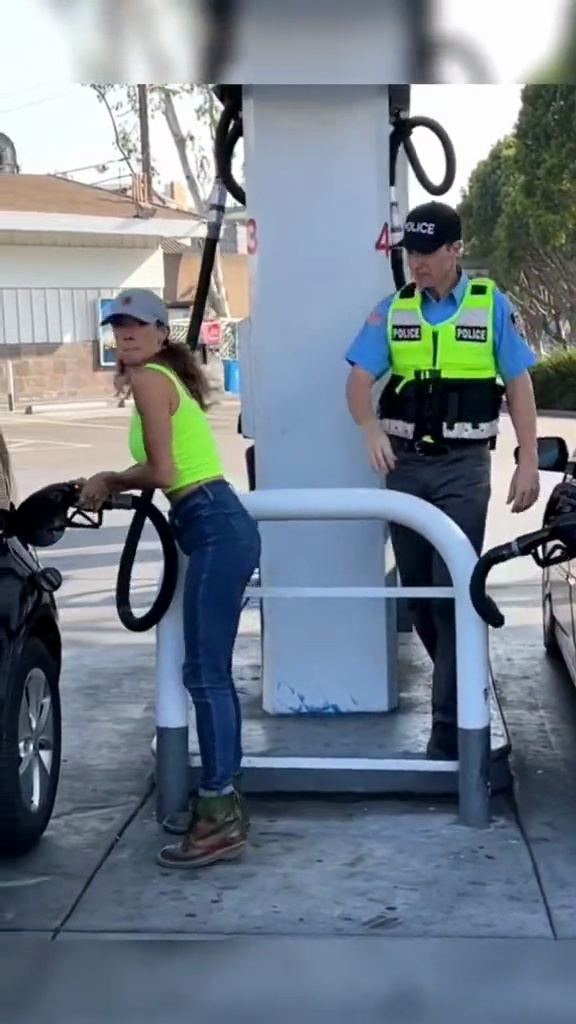

In [290]:
display_handle = display(None, display_id=True)
for img in frames1:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)
    
# for img in frames2:
#     display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
#     time.sleep(0.025)
# for img in frames3:
#     display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
#     time.sleep(0.025)
# for img in frames4:
#     display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
#     time.sleep(0.025)

## 3. Generating the Voiceover Script with GPT-4V

In [292]:
# load_dotenv()


client = OpenAI(
    # This is the default and can be omitted
    api_key='',
)

# FUNNY
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video i want to upload. Create a short funny remark about the video that will play at the beginning."
            +"It should be only one sentence long."
            ,*map(lambda x: {"image": x, "resize": 768}, frames1[0::45]), # every 45th frame
        ],
    },
]


# TRAVEL
# PROMPT_MESSAGES = [
#     {
#         "role": "user",
#         "content": [
#             "These are frames of a video i want to upload. Create a short travel related remark about the video that will play at the beginning."
#             +" It should be no longer than two sentences. It should be related to "+ short_description+"."
#             +" It should embody the feeling of adventure."
#             ,*map(lambda x: {"image": x, "resize": 768}, frames1[0::45]), # every 45th frame
#         ],
#     },
# ]



response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=PROMPT_MESSAGES,
    max_tokens=100
)


print(response.choices[0].message.content)

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4-vision-preview in organization org-mXmpTZxxmSYOTI6oiQM1UtxZ on tokens per min (TPM): Limit 10000, Used 8350, Requested 7026. Please try again in 32.255s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

## 4. Converting Text to Speech And Saving To File


In [286]:
speech_file_path =  "speech.mp3"
with client.audio.speech.with_streaming_response.create(
  model="tts-1",
  voice="alloy",
  input=response.choices[0].message.content
) as res:
    res.stream_to_file(speech_file_path)